Objective: The main objective of this project is to understand the direct marketing campaigns of a Portuguese banking institution. By applying the analysis over historical data before the regulation, may provide useful insights to solve business issues.The machine learning algorithms are analysed to make the model to get the useful information and to give meaningfull insights.

In [1]:
import pandas as pd
df=pd.read_csv(r'term_deposit.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#Age: The age of the customer.
#Job: The occupation of the customer.
#Marital Status: The marital status of the customer.
#Education: The education level of the customer.
#Default: Whether or not the customer has credit in default.
#Balance: The balance of the customer's account.
#Housing Loan: Whether or not the customer has a housing loan.
#Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
#Day: The day of the month when the last contact with the customers was made.
#Duration: The duration (in seconds) of the last contact with customers during a campaign.
#Campaign Contacts Count: Number of contacts performed during this campaign for each customer
#pdays: number days passed since previously contacted form previous camapign
#poutcome: outcome from previous marketing campaign

In [3]:
df.shape

(45211, 17)

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [7]:
for col in df.columns:
    print(df[col].value_counts())

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no   

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
import warnings
warnings.filterwarnings('ignore')

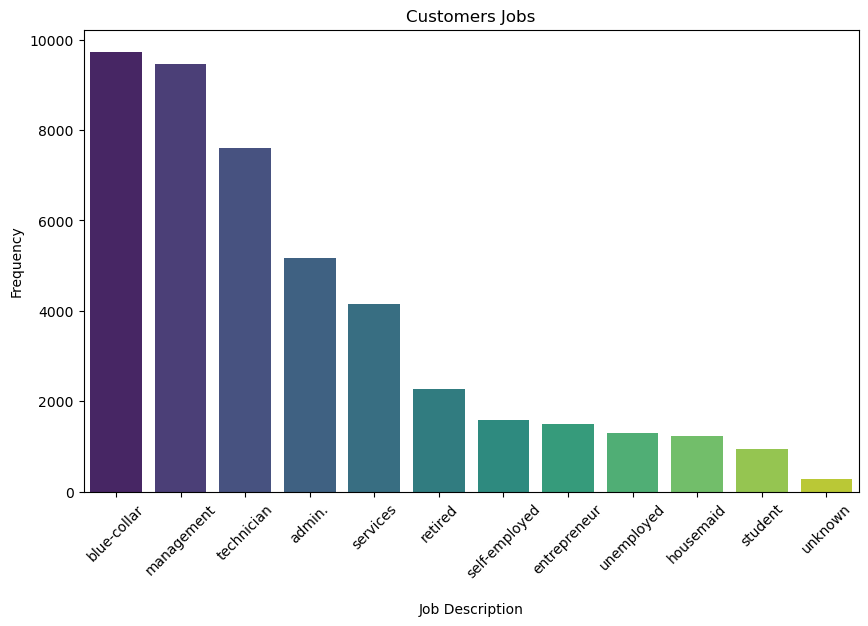

In [10]:
#count of customers job in the specific field
import matplotlib.pyplot as plt
import seaborn as sns 
job_counts= df['job'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Customers Jobs')
plt.xlabel('\nJob Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

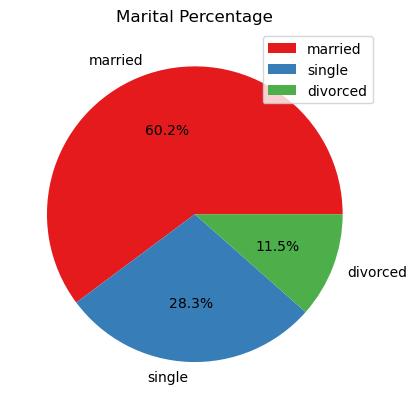

In [11]:
#marital status
marital = df['marital'].value_counts()
marital.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Marital Percentage', colors=plt.cm.Set1.colors)
plt.ylabel('')
plt.show()

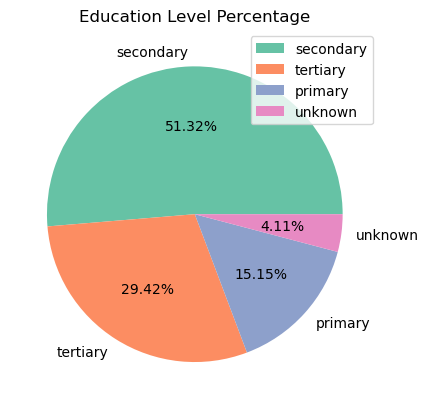

In [12]:
education= df['education'].value_counts()
education.plot(kind="pie", autopct='%1.2f%%', legend=True, title='Education Level Percentage', colors=plt.cm.Set2.colors)
plt.ylabel('')
plt.show()

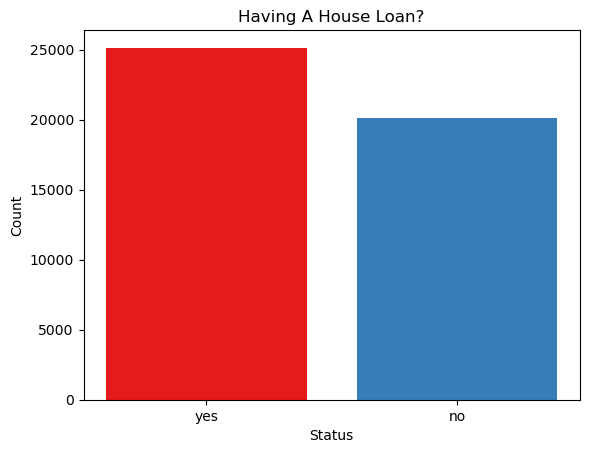

In [13]:
house = df['housing'].value_counts()
status = house.index
people_count = house.values
plt.bar(status, people_count, color=plt.cm.Set1.colors)
plt.title('Having A House Loan?')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


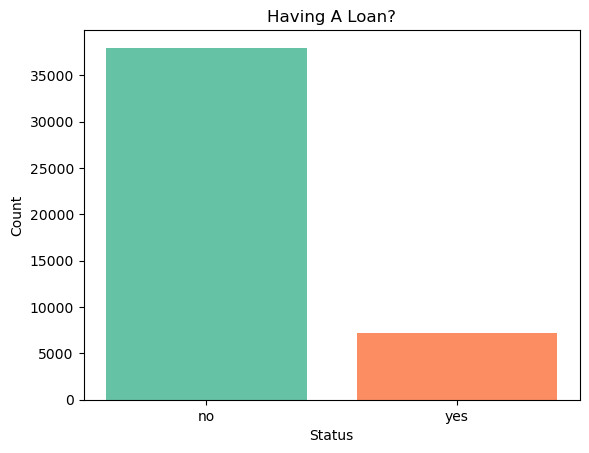

In [14]:
loan = df['loan'].value_counts()
status = loan.index
people_count = loan.values
plt.bar(status, people_count, color=plt.cm.Set2.colors)
plt.title('Having A Loan?')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [15]:
df.drop(columns=['contact', 'day', 'month', 'campaign'], inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,261,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,-1,0,unknown,no


In [16]:
df = df.rename(columns={'Target': 'deposit'})
df

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,261,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,-1,0,unknown,no


In [17]:
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,261,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,151,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,92,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,198,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,456,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,1127,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,508,-1,0,unknown,0


Split the dataset into input features and target column

In [18]:
x=df.drop(['deposit'], axis=1)
y=df['deposit']
x

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,261,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,151,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,92,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,198,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,456,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,1127,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,508,-1,0,unknown


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int64

In [20]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [21]:
import category_encoders as ce

# Select only categorical columns for encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Apply ordinal encoding to only categorical columns
encoder = ce.OrdinalEncoder(cols=categorical_columns)
x = encoder.fit_transform(x)

# View the result
x.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome
0,58,1,1,1,1,2143,1,1,261,-1,0,1
1,44,2,2,2,1,29,1,1,151,-1,0,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.51948052, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.        , ..., 0.21215596, 0.01090909,
        1.        ],
       [0.50649351, 0.27272727, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.        , ..., 0.21674312, 0.04      ,
        0.66666667]])

In [23]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,age,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome
0,0.519481,0.000000,0.0,0.000000,0.0,0.092259,0.0,0.0,0.053070,0.0,0.0,0.0
1,0.337662,0.090909,0.5,0.333333,0.0,0.073067,0.0,0.0,0.030704,0.0,0.0,0.0
2,0.194805,0.181818,0.0,0.333333,0.0,0.072822,0.0,1.0,0.015453,0.0,0.0,0.0
3,0.376623,0.272727,0.0,0.666667,0.0,0.086476,0.0,0.0,0.018707,0.0,0.0,0.0
4,0.194805,0.363636,0.5,0.666667,0.0,0.072812,1.0,0.0,0.040260,0.0,0.0,0.0


Divide into Train dataset and test dataset 

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42) 

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36168, 12), (9043, 12), (36168,), (9043,))

Apply ML algo into training data

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(max_leaf_nodes=10)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('Support Vector Machine', SVC(kernel='rbf',probability=True))
]

Model Evaluation and Model Prediction

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results.append([name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ])

# Convert to DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [36]:
print(metrics_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.894062   0.639413  0.279560  0.389031
1           Decision Tree  0.896495   0.627258  0.350137  0.449412
2           Random Forest  0.895168   0.607519  0.370302  0.460137
3  Naive Bayes Classifier  0.857459   0.419643  0.473877  0.445114
4    Ada Boost Classifier  0.891850   0.619450  0.268561  0.374680
5  Support Vector Machine  0.891187   0.693141  0.175985  0.280702


Summary: Decision Tree Classifier, achieved the highest accuracy of 89.64% among all models. Making it reliable in predicting positive subscriptions which is suitable for high-dimensional classification tasks like this banking dataset.